<a href="https://colab.research.google.com/github/aimeexr/hello-world/blob/master/BUMK_746_Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Cleaning and Importing Data 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# import modules

import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, accuracy_score

%matplotlib inline

In [ ]:
#import dataset - applications have been remained

train_df = pd.read_csv('/content/drive/MyDrive/Data Science Final/data/train.csv')
#test_df = pd.read_csv('/content/drive/MyDrive/Data Science Final/data/test.csv')

In [ ]:
train_df = train_df.fillna("")
#test_df = test_df.fillna("")
train_df = train_df.drop(["Description","Name","RescuerID","PetID"], axis =1)
#test_df = test_df.drop(["Description","Name", "RescuerID", "PetID"], axis=1)

In [ ]:
train_df.shape

(14993, 20)

In [ ]:
#test_df.shape

## Divide AdoptionSpeed into 2 classes

In [ ]:
# Divide AdoptionSpeed
train_df['AdpSpeed'] = np.where(train_df['AdoptionSpeed'] == 0 & 1 , 1, 0)


In [ ]:
from sklearn.preprocessing import StandardScaler
  
# define standard scaler
scaler = StandardScaler()

# transform data
train_df.columns
train_df_std = scaler.fit_transform(train_df)
train_df_std = pd.DataFrame(train_df_std, columns=train_df.columns)

In [ ]:
train_df_std.corr(method = 'pearson')

,Type,Age,Breed1,Breed2,Gender,Color1,Color2,Color3,MaturitySize,FurLength,...,Dewormed,Sterilized,Health,Quantity,Fee,State,VideoAmt,PhotoAmt,AdoptionSpeed,AdpSpeed
Type,1.000000,-0.147162,0.057724,-0.043568,0.060843,0.097680,0.246333,0.201693,-0.171811,0.003036,...,0.025508,0.006737,-0.006864,0.036423,-0.042134,0.124549,-0.005967,0.049368,-0.091240,0.042997
Age,-0.147162,1.000000,-0.314346,-0.041010,-0.123423,0.090378,-0.039427,-0.053546,0.093673,0.153092,...,-0.053360,-0.189450,0.103215,-0.113076,0.089168,0.024523,-0.015969,-0.084778,0.100510,-0.000008
Breed1,0.057724,-0.314346,1.000000,-0.157053,0.071321,-0.035510,-0.007081,-0.000682,-0.010507,-0.108059,...,0.013216,0.052698,-0.034893,0.090194,-0.189526,-0.026832,0.020626,0.043395,0.107834,-0.039577
Breed2,-0.043568,-0.041010,-0.157053,1.000000,0.056907,-0.020324,0.003015,0.035679,0.049879,0.106220,...,-0.009817,-0.005989,-0.029285,0.038125,0.013508,-0.037993,0.001569,0.045953,-0.018642,0.030760
Gender,0.060843,-0.123423,0.071321,0.056907,1.000000,-0.115351,0.026507,0.259309,-0.091819,-0.030404,...,0.091431,0.040645,-0.045177,0.494489,-0.050491,0.002564,0.016816,0.098435,0.057622,-0.013337
Color1,0.097680,0.090378,-0.035510,-0.020324,-0.115351,1.000000,-0.113290,-0.282897,-0.029468,0.066967,...,-0.019318,-0.037050,0.024410,-0.116688,0.054180,0.024012,-0.006435,-0.041323,-0.044192,0.016167
Color2,0.246333,-0.039427,-0.007081,0.003015,0.026507,-0.113290,1.000000,0.088742,-0.065155,-0.008764,...,0.005812,0.007370,-0.004307,0.019876,-0.017308,0.026944,0.023983,0.059113,-0.038579,0.017542
Color3,0.201693,-0.053546,-0.000682,0.035679,0.259309,-0.282897,0.088742,1.000000,-0.051730,0.013581,...,0.048617,0.038899,-0.024782,0.272548,-0.019839,0.010554,0.019526,0.103662,-0.007014,0.015538
MaturitySize,-0.171811,0.093673,-0.010507,0.049879,-0.091819,-0.029468,-0.065155,-0.051730,1.000000,0.095142,...,-0.067352,-0.066321,-0.012957,-0.042832,0.041144,-0.062584,0.017032,0.015593,0.045653,-0.026437
FurLength,0.003036,0.153092,-0.108059,0.106220,-0.030404,0.066967,-0.008764,0.013581,0.095142,1.000000,...,0.016463,0.032092,0.028096,-0.038388,0.159693,-0.029317,-0.014740,-0.031557,-0.091337,0.054841


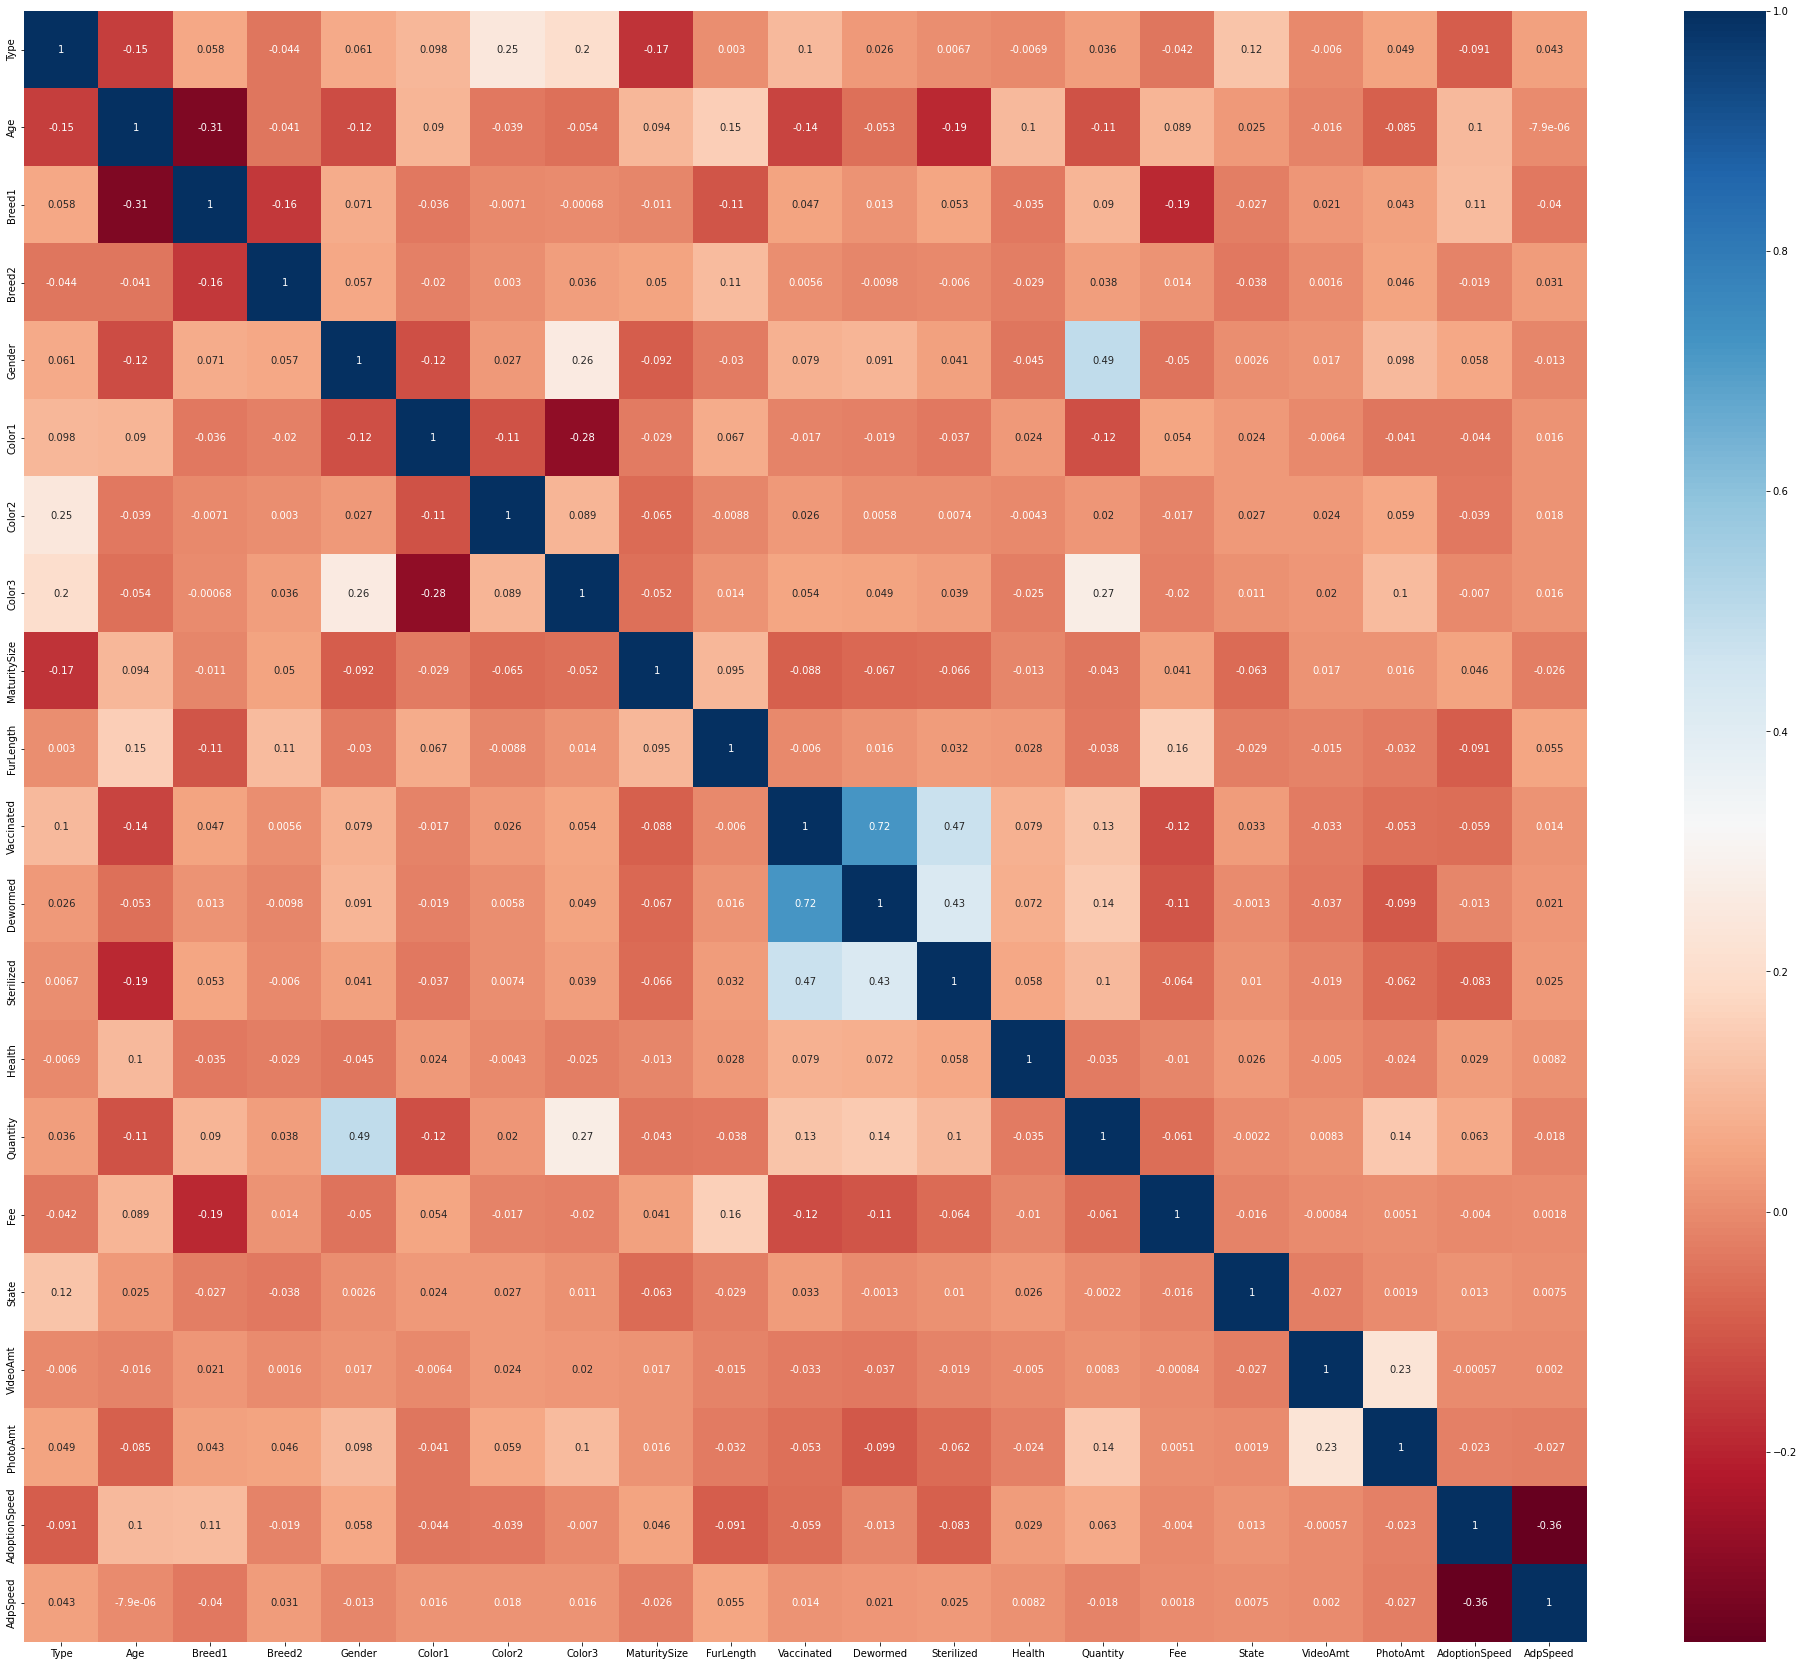

In [ ]:
import seaborn as sns
plt.figure(figsize=(35,30))
sns.heatmap(train_df_std.corr(), cbar = True, annot = True, cmap='RdBu')

In [ ]:
# Check if imbalanced 
print(train_df['AdpSpeed'].value_counts())

0    14583
1      410
Name: AdpSpeed, dtype: int64


## Deal with Imbalanced Data


In [ ]:
# Deal with imbalanced data
# import SMOTE oversampling and other necessary libraries 
from collections import Counter
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)


# Separating the independent variables from dependent variables
y = train_df["AdpSpeed"]
X = train_df.drop(["AdpSpeed","AdoptionSpeed"], axis=1)

#Split train-validation data
#X_train, X_val, y_train, y_val = train_test_split(X,y,test_size=0.2, random_state=123)

# set aside 20% of train and test data for evaluation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle = True, random_state = 123)

# Use the same function above for the validation set
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state= 123) # 0.25 x 0.8 = 0.2

# summarize class distribution
print("Before oversampling: ",Counter(y_train))

# define oversampling strategy
SMOTE = SMOTE()

# fit and apply the transform
# SMOTE the original data cuz the cross validation in SVM will deal with the orginal dataset
X_SMOTE, y_SMOTE = SMOTE.fit_resample(X, y) 


# summarize class distribution
print("After oversampling: ",Counter(y_SMOTE))

Before oversampling:  Counter({0: 8756, 1: 239})
After oversampling:  Counter({0: 14583, 1: 14583})


In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)
print(X_val.shape)
print(y_val.shape)

(8995, 19)
(2999, 19)
(8995,)
(2999,)
(2999, 19)
(2999,)


In [ ]:
X_test.head()

,Type,Age,Breed1,Breed2,Gender,Color1,Color2,Color3,MaturitySize,FurLength,Vaccinated,Dewormed,Sterilized,Health,Quantity,Fee,State,VideoAmt,PhotoAmt
10216,2,4,266,0,2,3,7,0,1,2,2,2,2,1,1,0,41326,0,5.0
14913,1,18,307,0,2,2,6,0,2,2,3,3,3,1,1,0,41401,0,1.0
14759,1,36,307,0,1,1,0,0,2,2,1,1,1,1,1,0,41401,0,3.0
3901,1,1,307,307,3,1,2,7,2,1,2,2,2,1,3,80,41326,0,13.0
12059,1,1,307,0,1,1,2,0,2,1,2,2,2,1,1,0,41401,0,3.0


In [ ]:
X_val.head()

,Type,Age,Breed1,Breed2,Gender,Color1,Color2,Color3,MaturitySize,FurLength,Vaccinated,Dewormed,Sterilized,Health,Quantity,Fee,State,VideoAmt,PhotoAmt
7848,1,2,103,307,2,1,4,0,2,2,2,2,2,1,1,0,41401,0,1.0
10728,1,2,307,0,1,2,0,0,2,1,2,2,2,1,1,0,41326,0,2.0
13805,1,7,307,218,1,1,7,0,1,2,1,1,2,1,1,0,41326,0,3.0
5514,1,4,20,109,2,5,7,0,2,1,1,1,1,1,1,0,41326,0,3.0
7842,2,12,266,0,1,1,0,0,1,1,2,2,2,1,1,0,41326,0,1.0


In [ ]:
X.mean()

Type                1.457614
Age                10.452078
Breed1            265.272594
Breed2             74.009738
Gender              1.776162
Color1              2.234176
Color2              3.222837
Color3              1.882012
MaturitySize        1.862002
FurLength           1.467485
Vaccinated          1.731208
Dewormed            1.558727
Sterilized          1.914227
Health              1.036617
Quantity            1.576069
Fee                21.259988
State           41346.028347
VideoAmt            0.056760
PhotoAmt            3.889215
dtype: float64

## SVM

In [ ]:
# SVM
# import SVM libraries 
from sklearn.svm import SVC
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score

svm = make_pipeline(StandardScaler(), SVC(gamma='auto'))
svm.fit(X_SMOTE, y_SMOTE)

# use cross validation to tune our model
score = cross_val_score(svm, X_SMOTE, y_SMOTE, cv=5)
recall = cross_val_score(svm, X_SMOTE, y_SMOTE, cv=5, scoring="recall") # Find the real true
precision = cross_val_score(svm, X_SMOTE, y_SMOTE, cv=5, scoring="precision") # Find the real false 


In [ ]:
svm_accuracy = score.mean()*100
svm_recall = recall.mean()*100
svm_precision = precision.mean()*100

print("Accuracy of the SVM model is : {:.2f}%".format(svm_accuracy))
print("Recall of the SVM model is : {:.2f}%".format(svm_recall))
print("Precision of the SVM model is : {:.2f}%".format(svm_precision))

Accuracy of the SVM model is : 86.85%
Recall of the SVM model is : 90.64%
Precision of the SVM model is : 84.27%


## Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression


# fit and apply the transform - SMOTE the training dataset 
X_train_SMOTE, y_train_SMOTE = SMOTE.fit_resample(X_train, y_train)

# Feature Scaling / Standarization 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_SMOTE_scaled = scaler.fit_transform(X_train_SMOTE)
X_val_scaled = scaler.transform(X_val)

lr = LogisticRegression(solver='liblinear', C=10.0, random_state=123)
lr.fit(X_train_SMOTE, y_train_SMOTE)

lr_pred = lr.predict(X_val)
lr_accuracy= accuracy_score(y_val, lr_pred)*100
lr_conf_m = confusion_matrix(y_val, lr_pred)


print("Accuracy of the logistic regression is : {:.2f}%".format(lr_accuracy))
print(lr_conf_m)

Accuracy of the logistic regression is : 68.36%
[[2024  901]
 [  48   26]]


## k-NN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, accuracy_score

# fit and apply the transform - SMOTE the training dataset 
X_train_SMOTE, y_train_SMOTE = SMOTE.fit_resample(X_train, y_train)

In [ ]:
# Feature Scaling / Standarization 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_SMOTE_scaled = scaler.fit_transform(X_train_SMOTE)
X_val_scaled = scaler.transform(X_val)

In [ ]:
# We first create a KNN classifier instance and then prepare a range of values of hyperparameter K 
# from 5 to 20 that will be used by GridSearchCV to find the best value of K.


# Furthermore, we set our cross-validation batch sizes cv = 10 and set scoring metrics as accuracy as our preference.
knn = KNeighborsClassifier()
from sklearn.model_selection import GridSearchCV
k_range = list(range(5, 20))
param_grid = dict(n_neighbors=k_range)

# defining parameter range
grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy', return_train_score=False,verbose=1)
  
# fitting the model for grid search
grid_search=grid.fit(X_train_SMOTE_scaled, y_train_SMOTE)

Fitting 10 folds for each of 15 candidates, totalling 150 fits


In [ ]:
# find the best k
print(grid_search.best_params_)

{'n_neighbors': 6}


In [ ]:
knn = KNeighborsClassifier(n_neighbors=6)

knn.fit(X_train_SMOTE_scaled, y_train_SMOTE)

knn_pred = knn.predict(X_val_scaled) 
knn_accuracy = accuracy_score(y_val,knn_pred)*100
knn_conf_m = confusion_matrix(y_val, knn_pred)

print("Accuracy of the k-NN model is : {:.2f}%".format(knn_accuracy))
print(knn_conf_m)

Accuracy of the k-NN model is : 82.59%
[[2455  468]
 [  54   22]]


## Naive Bayes 

In [ ]:
from sklearn.naive_bayes import GaussianNB

# fit and apply the transform - SMOTE the training dataset 
X_train_SMOTE, y_train_SMOTE = SMOTE.fit_resample(X_train, y_train)

# Feature Scaling / Standarization 
 
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_SMOTE_scaled = scaler.fit_transform(X_train_SMOTE)
X_val_scaled = scaler.transform(X_val)


nb = GaussianNB()
nb.fit(X_train_SMOTE_scaled, y_train_SMOTE)
nb_pred = nb.predict(X_val_scaled)
nb_accuracy = accuracy_score(y_val,nb_pred)*100
nb_conf_m = confusion_matrix(y_val, nb_pred)

print("Accuracy of the Naive Bayes model is : {:.2f}%".format(nb_accuracy))
print(nb_conf_m)


Accuracy of the Naive Bayes model is : 32.98%
[[ 940 1983]
 [  27   49]]


## Decision Tree

In [ ]:
# fit and apply the transform - SMOTE the training dataset 
X_train_SMOTE, y_train_SMOTE = SMOTE.fit_resample(X_train, y_train)

from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=123)
dt.fit(X_train_SMOTE, y_train_SMOTE)
dt_pred = dt.predict(X_val)
dt_accuracy = accuracy_score(y_val, dt_pred)*100
dt_conf_m = confusion_matrix(y_val, dt_pred)

print("Accuracy of the Decision Tree model is : {:.2f}%".format(dt_accuracy))
print(dt_conf_m)

Accuracy of the Decision Tree model is : 92.76%
[[2770  153]
 [  64   12]]


## XGBoost

In [ ]:
import xgboost as xgb
# fit and apply the transform - SMOTE the training dataset 
X_train_SMOTE, y_train_SMOTE = SMOTE.fit_resample(X_train, y_train)

xgb = xgb.XGBClassifier()
xgb.fit(X_train_SMOTE,y_train_SMOTE)
xgb_pred = xgb.predict(X_val)
xgb_accuracy = accuracy_score(y_val, xgb_pred)*100
xgb_conf_m = confusion_matrix(y_val, xgb_pred)

print("Accuracy of the XGBoost model is : {:.2f}%".format(xgb_accuracy))
print(xgb_conf_m)

Accuracy of the XGBoost model is : 93.66%
[[2802  121]
 [  69    7]]


## Random Forest 

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier() 
rf_model = rf.fit(X_train_SMOTE, y_train_SMOTE)
rf_pred = rf.predict(X_val)
rf_accuracy = accuracy_score(y_val, rf_pred)*100 
rf_conf_m = confusion_matrix(y_val, rf_pred)
 
print("Accuracy of the Random Forest is : {:.2f}%".format(rf_accuracy))
print(rf_conf_m)

Accuracy of the Random Forest is : 95.80%
[[2864   59]
 [  67    9]]


## Implant Testing Dataset

In [ ]:
test_pred = rf_model.predict(X_test)


test_accuracy = accuracy_score(y_test, test_pred)*100
test_conf_m = confusion_matrix(y_test, test_pred)

print("Accuracy of the testing dataset using Random Forest model is : {:.2f}%".format(test_accuracy))
print(test_conf_m)

Accuracy of the testing dataset using Random Forest model is : 95.47%
[[2863   39]
 [  97    0]]
